# Decomposition plot of figure 7

## Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import colicycle.decomposition as dp
import tabulate
import numpy as np

## Define reference folder

In [2]:
folder_prefix = '../'
tosave_folder = folder_prefix+'Plots/'

## Load data and complete dataframe with initiation centric variables

In [3]:
#load experimental data
file_to_analyze = folder_prefix+'PreProcessed/20170327_GW339_temp/colidata.pkl'
datatype = 'exp'
time_scale = 3
colidata_exp = pd.read_pickle(file_to_analyze)

colidata_exp = dp.cross_generation_construct(colidata_exp, 'exp', time_scale = 3)

In [4]:
#load simulation data
file_to_analyze = folder_prefix+'DataSimulations/glycerolauto_standard.pkl'
datatype = 'simul'
time_scale = 1
colidata_simul = pd.read_pickle(file_to_analyze)

colidata_simul = dp.cross_generation_construct(colidata_simul, datatype, time_scale = time_scale)

/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
#create empty matrix
overlay = np.zeros((4,4),dtype = float)
overlay[:] = np.nan
for i in range(4):
    overlay[i,i] = 1
    
contours_x = [0.5, 3.5, 3.5, 2.5,2.5, 1.5,1.5, 0.5,0.5]
contours_y = [-0.5, -0.5, 2.5, 2.5,1.5, 1.5,0.5, 0.5,-0.5]

In [6]:
coli_exp, sorted_combinations, sorted_vals_exp, table_to_plot = dp.decompose_adder_init(colidata_exp)
coli_simul, _, sorted_vals_simul, _ = dp.decompose_adder_init(colidata_simul)

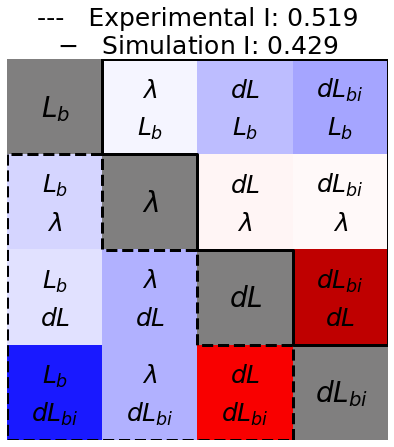

In [7]:
fig = dp.plot_exp_simul(coli_exp, coli_simul, sorted_combinations, sorted_vals_exp,sorted_vals_simul, 
                        dp.renaming_classic, comb1 = 1, comb2 = 0)
plt.imshow(overlay, cmap = 'gray', alpha = 0.5)#fig.suptitle('Classic Experimental', fontsize=25)
#for x in contours:
plt.plot(contours_x,contours_y,'k-',linewidth = 3)
plt.plot(contours_y,contours_x,'k--',linewidth = 3)
plt.show()
fig.savefig(tosave_folder+'fig_7Ba.pdf')

In [8]:
coli_exp, sorted_combinations, sorted_vals_exp, table_to_plot = dp.decompose_double_adder(colidata_exp)
coli_simul, _, sorted_vals_simul, _ = dp.decompose_double_adder(colidata_simul)

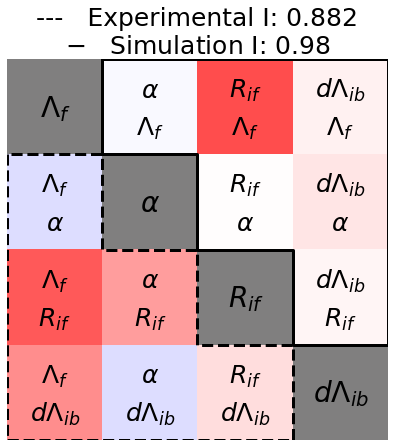

In [9]:
fig = dp.plot_exp_simul(coli_exp, coli_simul, sorted_combinations, sorted_vals_exp, sorted_vals_simul,
                        dp.renaming_modelGW)
plt.imshow(overlay, cmap = 'gray', alpha = 0.5)#fig.suptitle('Classic Experimental', fontsize=25)
#for x in contours:
plt.plot(contours_x,contours_y,'k-',linewidth = 3)
plt.plot(contours_y,contours_x,'k--',linewidth = 3)
plt.show()
fig.savefig(tosave_folder+'fig_7Bb.pdf')
